# Python Time Series Crash Course_Part 3: Temporal Structure, White Noise, Random Walk

## Full Day Workshop for user learn Data Science with Python
### 2017 Dec Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose
3

# Time Series Noise
## White Noise Or Not?
White noise is an important concept in time series forecasting. If a time series is white noise, it
is a sequence of random numbers and cannot be predicted. If the series of forecast errors are not
white noise, it suggests improvements could be made to the predictive model.

## Definition
A time series may be white noise. A time series is white noise if the variables are independent
and identically distributed with a mean of zero. This means that 

** all variables have the same variance ** 

$$sigma2$$ 

and 

** each value has a zero correlation with all other values in the series **

If the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian
white noise.


## Why doest it matters

White noise is an important concept in time series analysis and forecasting. It is important for
two main reasons:
-  **Predictability** : If your time series is white noise, then, by denition, it is random. You
cannot reasonably model it and make predictions.
- **Model Diagnostics**: The series of errors from a time series forecast model should ideally
be white noise.


Model Diagnostics is an important area of time series forecasting. Time series data are
expected to contain some white noise component on top of the signal generated by the underlying
process. For example:

$$y(t) = signal(t) + noise(t)$$

#### The series of forecast errors should ideally be white noise. 

When forecast errors are
white noise, it means that all of the signal information in the time series has been harnessed by
the model in order to make predictions.

## Is your Time Series White Noise?
Your time series is not white noise if any of the following conditions are true:

#### Does your series have a non-zero mean?
#### Does the variance change over time?
#### Do values correlate with lag values?

## Tools/Steps can help you to detect WN:

Some tools that you can use to check if your time series is white noise are:
- **Create a line plot**. Check for gross features like a changing mean, variance, or obvious
relationship between lagged variables.
- **Calculate summary statistics**. Check the mean and variance of the whole series against
the mean and variance of meaningful contiguous blocks of values in the series (e.g. days,
months, or years).
- **Create an autocorrelation plot**. Check for gross correlation between lagged variables.

# Example
In this section, we will create a Gaussian white noise series in Python and perform some checks.
It is helpful to create and review a white noise time series in practice. It will provide the frame
of reference and example plots and statistical tests to use and compare on your own time series
projects to check if they are white noise.


In [6]:
from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)

Firstly, we can create a list of 1,000 random Gaussian
variables using the $$gauss()$$


function from the random module1. 

We will draw variables from a
Gaussian distribution with a mean $$(mu)$$


of 0.0 and a standard deviation 

$$(sigma)$$

of 1.0. Once
created, we can wrap the list in a Pandas Series for convenience.

In [4]:
print(series.describe())
# No surprise the nearly 0 MEAN & 1 Std

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


#### We can see that it does appear that the series is random from below line plot

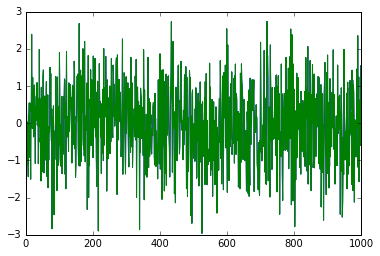

In [7]:
# line plot
series.plot()
pyplot.show()

#### We can also create a histogram and conrm the distribution is Gaussian.

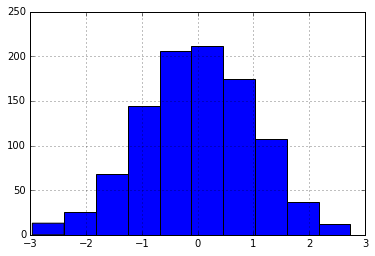

In [8]:
# histogram plot
series.hist()
pyplot.show()

#### the histogram shows the tell-tale bell-curve shape.

/usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  from ipykernel import kernelapp as app


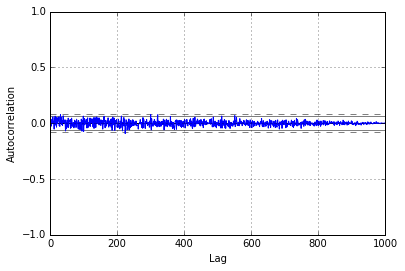

In [9]:
# autocorrelation
autocorrelation_plot(series)
pyplot.show()

#### The correlogram does not show any obvious autocorrelation pattern. There are some spikes above the 95% and 99% condence level, but these are a statistical  fluke.

# Predictibility: Random Walk
How do you know your time series problem is predictable? This is a dicult question with
time series forecasting. There is a tool called a random walk that can help you understand the
predictability of your time series forecast problem.

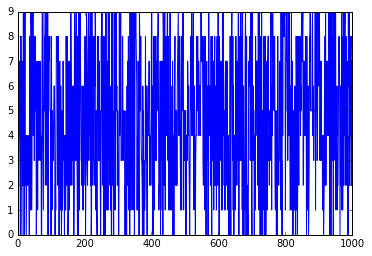

In [11]:
# create and plot a random series
from random import seed
from random import randrange
from matplotlib import pyplot
seed(1)
series = [randrange(10) for i in range(1000)]
pyplot.plot(series)
pyplot.show()
#It's a real mess.

The Python standard library contains the random module1 that provides access to a suite of
functions for generating random numbers. The 

$$randrange()$$ 

function2 can be used to generate
a random integer between 0 and an upper limit. 

We can use the randrange() function to
generate a list of 1,000 random integers between 0 and 10.

#### This is not a random walk. 

It is just a sequence of random numbers also called **white noise** as we stated above. 

A common mistake that beginners make is to think that a random walk is a
list of random numbers, and this is not the case at all.

## Definition of Random Walk

A random walk is dierent from a list of random numbers because the next value in the sequence
is a modication of the previous value in the sequence. 

The process used to generate the series
forces dependence from **one-time step** to the next. 

#### This dependence provides some consistency from step-to-step rather than the large jumps that a series of independent, random numbers provides. 

It is this dependency that gives the process its name as a random walk or a 

$$ drunkard's walk $$

A simple model of a random walk is as follows:
1. Start with a random number of either -1 or 1.
2. Randomly select a -1 or 1 and add it to the observation from the previous time step.
3. Repeat step 2 for as long as you like.

More succinctly, we can describe this process as:

$$y(t) = B0 + B1 * X(t - 1) + e(t)$$

Where y(t) is the next value in the series. B0 is a coecient that if set to a value other
than zero adds a constant drift to the random walk. B1 is a coecient to weight the previous
time step and is set to 1.0. X(t-1) is the observation at the previous time step. e(t) is the
white noise or random 
uctuation at that time.

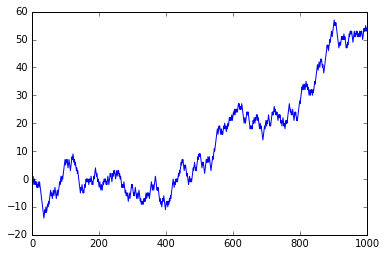

In [13]:
# create and plot a random walk
from random import seed
from random import random
from matplotlib import pyplot
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

We can implement this in Python by looping
over this process and building up a list of 1,000 time steps for the random walk.

We can see that it looks very
dierent from our above sequence of random numbers. In fact, the shape and movement looks
like a realistic time series for the price of a security on the stock market.

## Random Walk & Autocorrelation
We can calculate the correlation between each observation and the observations at previous time
steps. A plot of these correlations is called an autocorrelation plot or a correlogram3. Given the
way that the random walk is constructed, we would expect 

**a strong autocorrelation with the
previous observation** and 

**a linear fall off from there with previous lag values**

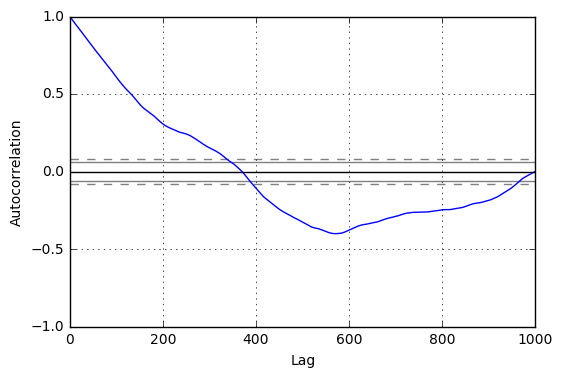

In [2]:
# plot the autocorrelation of a random walk
from random import seed
from random import random
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
autocorrelation_plot(random_walk)
pyplot.show()

#### Running the example, we generally see the expected trend, in this case across the rst few hundred lag observations.

## Random Walk and Stationarity
A stationary time series is one where the values are not a function of time. 

**Therefore we can expect a random walk to be non-stationary**. 

In fact, all random walk
processes are non-stationary.

a non-stationary time series does not have a consistent mean and/or variance over
time. A review of the random walk line plot might suggest this to be the case. We can conrm
this using a statistical signicance test, specically the 

$$Augmented Dickey-Fuller test$$

In [26]:
!pip install --upgrade statsmodels

    100% |████████████████████████████████| 6.2MB 177kB/s eta 0:00:01
    100% |████████████████████████████████| 46.7MB 24kB/s  eta 0:00:01
    100% |████████████████████████████████| 24.3MB 51kB/s  eta 0:00:01
Requirement already up-to-date: patsy in /usr/local/src/bluemix_jupyter_bundle.v74/notebook/lib/python2.7/site-packages (from statsmodels)
Requirement already up-to-date: numpy>=1.8.2 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sbb6-28ae32a56257b0-666d72869b6d/.local/lib/python2.7/site-packages (from scipy->statsmodels)
Requirement already up-to-date: pytz>=2011k in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sbb6-28ae32a56257b0-666d72869b6d/.local/lib/python2.7/site-packages (from pandas->statsmodels)
Requirement already up-to-date: python-dateutil in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sbb6-28ae32a56257b0-666d72869b6d/.local/lib/python2.7/site-packages (from pandas->statsmodels)
Requirement already up-to-date: six in /gpfs/global_fs01/sym_shared/YPProdSpark/u

### Bug exist for Python 2.x for statsmodels. Please upgrade to 3.0 

In [3]:
# calculate the stationarity of a random walk
from statsmodels.tsa.stattools import adfuller
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	10%: -2.568
	1%: -3.437
	5%: -2.864


The null hypothesis of the test is that the time series is non-stationary. Running the example,
we can see that the test statistic value was **0.341605**

#### This is larger than all of the critical values at the 1%, 5%, and 10% condence levels. 

Therefore, we can say that the time series does
appear to be non-stationary with a low likelihood of the result being a statistical 
uke.

## Make Random Walk Stationary with Differencing
We can make the random walk stationary by taking the rst dierence. That is replacing
each observation as the dierence between it and the previous value. Given the way that this
random walk was constructed, we would expect this to result in a time series of -1 and 1 values.

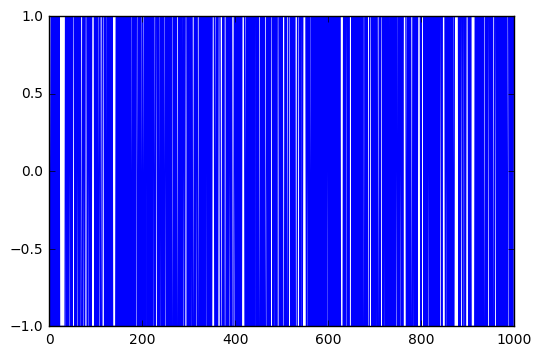

In [6]:
# take difference
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)
# line plot
pyplot.plot(diff)
pyplot.show()

This dierence graph also makes it clear that really we have no information to work with
here other than a series of random moves. There is no structure to learn. Now that the time series is stationary, we can recalculate the correlogram of the dierenced series

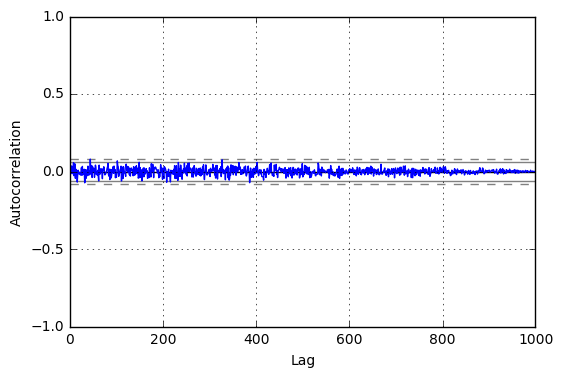

In [7]:
# take difference
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i - 1]
    diff.append(value)
# line plot
autocorrelation_plot(diff)
pyplot.show()

we can see no signicant relationship between the lagged observations,
as we would expect from the way the random walk was generated. All correlations are small,
close to zero and below the 95% and 99% condence levels (beyond a few statistical 
ukes)

## Predicting a Random Walk
A random walk is unpredictable; it cannot reasonably be predicted. Given the way that the
random walk is constructed, we can expect that the best prediction we could make would be to
#### use the observation at the previous time step as what will happen in the next time step. 

Simply
because we know that the next time step will be a function of the prior time step. This is often
called the $$naive-forecast$$, or a **persistence model**

We can implement this in Python by rst splitting the dataset into train and test sets, then
using the persistence model to predict the outcome using a **rolling forecast method**


Once all predictions are collected for the test set, the root mean squared error (RMSE) is calculated.

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# persistence
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


Running the example estimates the RMSE of the model as 1. This too is expected, given
that we know that the variation from one time step to the next is always going to be 1, either
in the positive or negative direction.